In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'..\data\processed\Canada.csv')

df

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1000,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2000,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3000,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3000,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3000,30.2,23.9,27.1,NaN,11684,9818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2017,49.632517,18138320,50.367480,18406915,36545236,1.199521,24.124458,25.023597,49.148056,...,8.054,104768,361274,2.6102,5.6,4.9,5.3,1299.0,1962,1712
57,2018,49.657362,18405543,50.342638,18659541,37065084,1.412456,24.098516,25.703142,49.801657,...,7.094,114101,417974,2.4280,5.6,4.9,5.2,1275.0,1941,1697
58,2019,49.679793,18680213,50.320210,18921018,37601230,1.436137,24.052564,26.424826,50.477390,...,6.888,101757,391914,2.4350,5.5,4.8,5.2,1251.0,1897,1659
59,2020,49.689062,18885404,50.310938,19121762,38007166,1.073796,24.001803,27.253896,51.255699,...,6.985,109214,195181,2.4330,5.5,4.7,5.1,1271.0,1878,1645


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 86 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           61 non-null     int64  
 1   Population, male (% of total population)                       61 non-null     float64
 2   Population, male                                               61 non-null     int64  
 3   Population, female (% of total population)                     61 non-null     float64
 4   Population, female                                             61 non-null     int64  
 5   Population, total                                              61 non-null     int64  
 6   Population growth (annual %)                                   61 non-null     float64
 7   Age dependency ratio, young (% of working-age population)      6

In [4]:
df.head()

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3,30.2,23.9,27.1,NaN,11684,9818


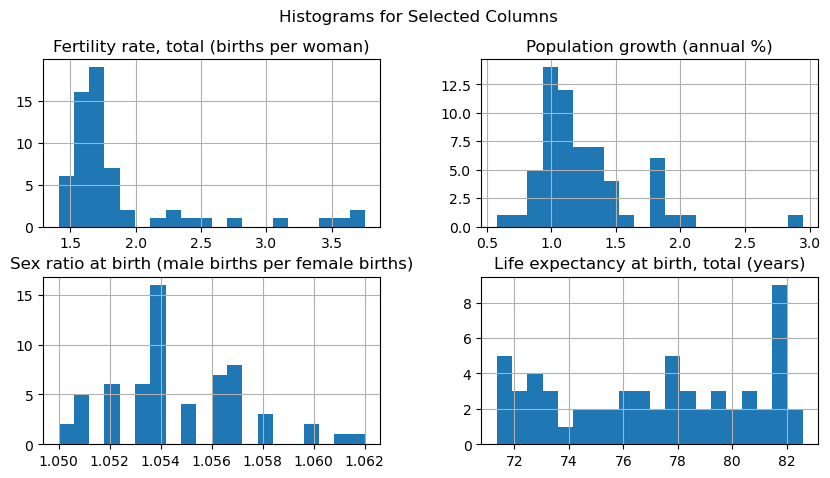

In [5]:
columns_of_interest = ["Fertility rate, total (births per woman)", "Population growth (annual %)", "Sex ratio at birth (male births per female births)", "Life expectancy at birth, total (years)"]
df_selected = df[columns_of_interest]

df_selected.hist(figsize=(10, 5), bins=20)
plt.suptitle('Histograms for Selected Columns')
plt.show()


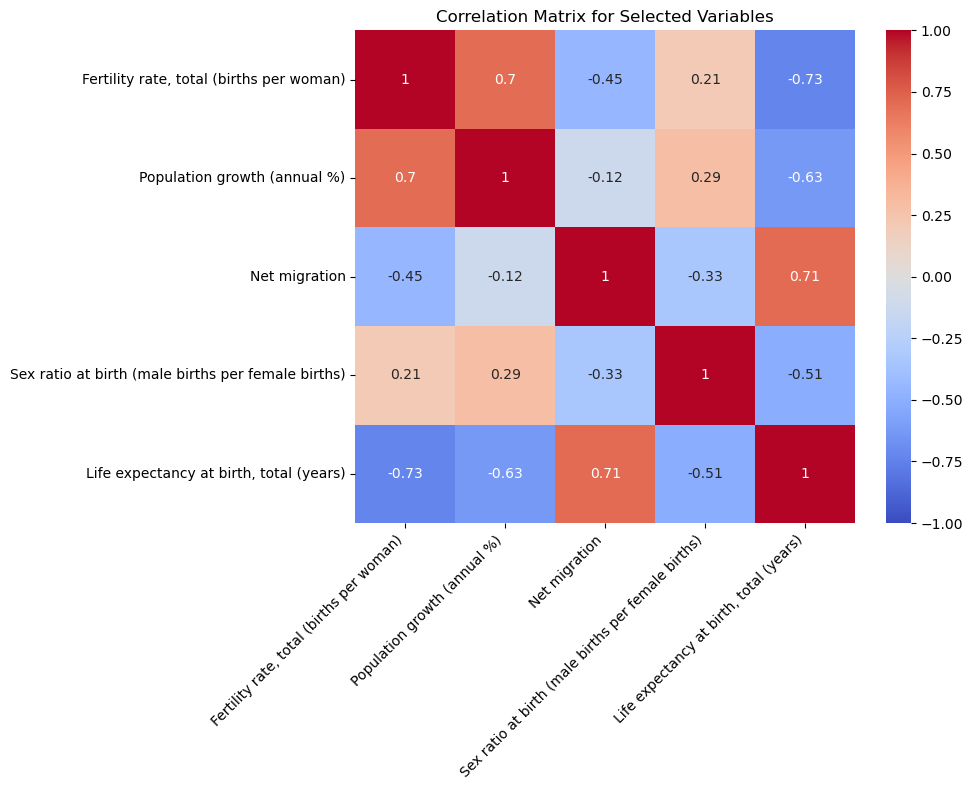

In [6]:
relevant_columns = [
    'Fertility rate, total (births per woman)', 
    'Population growth (annual %)', 
    'Net migration',
    'Sex ratio at birth (male births per female births)',
    'Life expectancy at birth, total (years)'
]
df_selected = df[relevant_columns]

correlation_matrix = df_selected.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
